## Import Important Libraries 

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pylab as plt
from sklearn.model_selection  import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sklearn.metrics

## Data Understanding

In [2]:
Conversions=pd.read_csv('Problem2_FInalConversions',sep='\t')
Conversions.columns = ["timestamp", "user_id", "product_id", "cart_value"]
Conversions.head()

,timestamp,user_id,product_id,cart_value
0,2017-07-26 00:00:12.301,0,H209597,31.50
1,2017-07-26 00:00:12.388,0,H211370,30.48
2,2017-07-26 00:00:14.389,0,A282331,51.00
3,2017-07-26 00:00:16.837,0,H211410,16.74
4,2017-07-26 00:00:19.625,0,H211801,34.35


### Conversions dataset contains the details of the customers to finally purchased from the site
- Timestamp: Order purchase timestamp
- user_id: unique identifier of the customer
- product_id: unique identifier of the product purchased
- cart_value: total cart value


In [3]:
Behavior=pd.read_csv('Problem2_Site_BrowingBehavior',sep='\t')
Behavior.columns = ["timestamp", "user_id", "browsing_url"]
Behavior.head()

,timestamp,user_id,browsing_url
0,2017-07-26 00:03:18.448,0,product
1,2017-07-26 00:36:59.028,0,default
2,2017-07-26 00:41:17.273,0,product-listing-category
3,2017-07-26 00:45:39.197,0,content
4,2017-07-26 00:45:48.487,0,home


### Browsing Behaviour dataset contains the overall browing in a particular day
- timestamp: time of the day
- user_id: unique identifier of customer
- browsing_url: website sections visited by the customer

## Creating Targeting Variable

In [4]:
# 1-If the customer bought the product(mapping from conversion dataset)
# 0-If the customer did not buy the product
con_user_id = list(Conversions['user_id'].unique())
Behavior['Confirmed'] = np.where(Behavior['user_id'].isin(con_user_id), 1,0)
Behavior.head()

,timestamp,user_id,browsing_url,Confirmed
0,2017-07-26 00:03:18.448,0,product,1
1,2017-07-26 00:36:59.028,0,default,1
2,2017-07-26 00:41:17.273,0,product-listing-category,1
3,2017-07-26 00:45:39.197,0,content,1
4,2017-07-26 00:45:48.487,0,home,1


## Data_Content_Analysis

In [5]:
Conversions.info(),Conversions.shape, Behavior.info(),Behavior.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79794 entries, 0 to 79793
Data columns (total 4 columns):
timestamp     79794 non-null object
user_id       79794 non-null int64
product_id    79794 non-null object
cart_value    79794 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5535923 entries, 0 to 5535922
Data columns (total 4 columns):
timestamp       object
user_id         int64
browsing_url    object
Confirmed       int32
dtypes: int32(1), int64(1), object(2)
memory usage: 147.8+ MB


(None, (79794, 4), None, (5535923, 4))

In [6]:
Conversions.isnull().sum(),Behavior.isnull().sum()

(timestamp     0
 user_id       0
 product_id    0
 cart_value    0
 dtype: int64, timestamp       0
 user_id         0
 browsing_url    0
 Confirmed       0
 dtype: int64)

The Null values are represented as 0 here instead of NaN and hence are not detected above.
To deal with these we proceed with removing all such data points as they present data of unknown customers all fused together and hence will interfere with the other individual known customer data values.

In [5]:
Behavior = Behavior[Behavior['user_id']!=0]
Behavior.shape
## Removing all those data values where user_id is 0. 

(4128045, 4)

##  Basic Data Visualisation

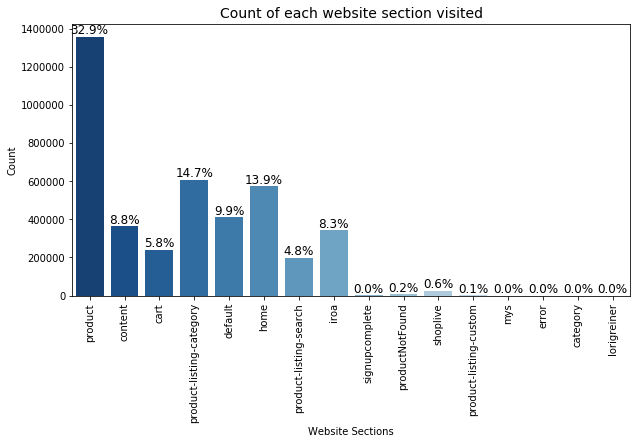

In [8]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.countplot(x='browsing_url', data=Behavior, palette='Blues_r')
#format_spines(ax, right_border=False)
ncount = len(Behavior)
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom', size=12)
ax.set_title('Count of each website section visited', size=14)
ax.set_xlabel('Website Sections')
ax.set_ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [9]:
Behavior['Confirmed'].value_counts()

0    3280108
1     847937
Name: Confirmed, dtype: int64

<Figure size 720x576 with 0 Axes>

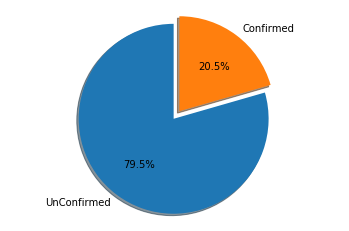

In [10]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
plt.figure(figsize=(10,8))
labels = 'UnConfirmed','Confirmed'
sizes = [ 79.459, 20.54 ]
explode = (0, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

#### In a particular day almost 20% users are buying any product from the site

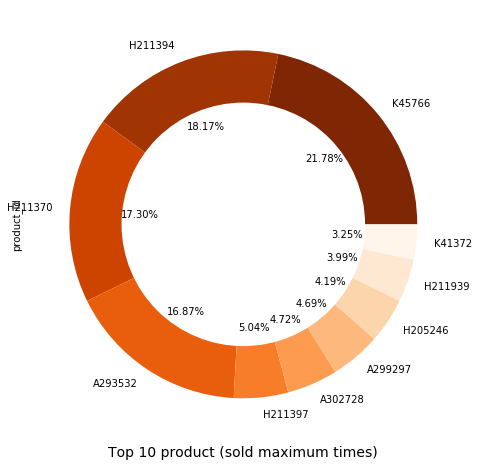

In [11]:
plt.figure(figsize=(10,8))
Conversions['product_id'].value_counts().head(10).plot(kind='pie',autopct='%1.2f%%',pctdistance=.6,cmap='Oranges_r')
plt.xlabel('Top 10 product (sold maximum times)', size=14)
centre_circle=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf() #gcf=get current figure
fig.gca().add_artist(centre_circle)

#### The above 10 products account for the highest revenue generation(for the given particular day)

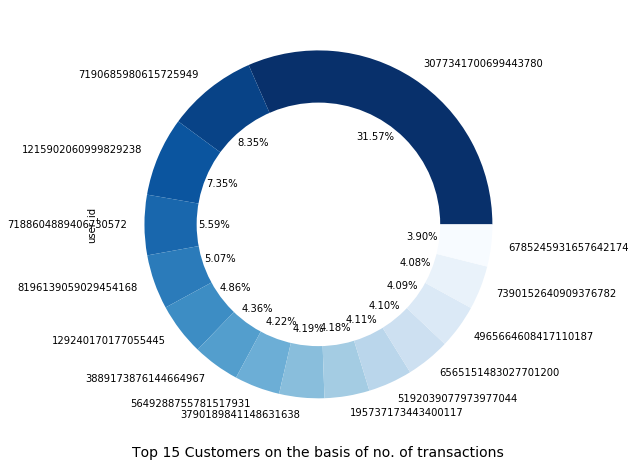

In [12]:
plt.figure(figsize=(10,8))
x=Behavior['user_id'].value_counts().head(15).plot(kind='pie',autopct='%1.2f%%',pctdistance=.6,cmap='Blues_r',subplots=True)
plt.xlabel('Top 15 Customers on the basis of no. of transactions', size=14)
centre_circle=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf() #gcf=get current figure
fig.gca().add_artist(centre_circle)

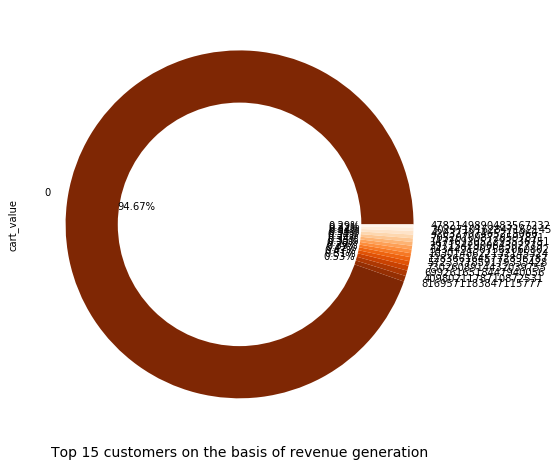

In [13]:
plt.figure(figsize=(10,8))
Conversions.groupby('user_id')['cart_value'].sum().sort_values(ascending=False).head(15).plot(kind='pie',autopct='%1.2f%%',pctdistance=.6,cmap='Oranges_r')
plt.xlabel('Top 15 customers on the basis of revenue generation', size=14)
centre_circle=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf() #gcf=get current figure
fig.gca().add_artist(centre_circle)

#### For that particular day we have our 15 most valuable customers

## Create new columns for behavior dataset

In [6]:
Behavior['Time'] = pd.to_datetime(Behavior['timestamp']).dt.time
Behavior['Dates'] = pd.to_datetime(Behavior['timestamp']).dt.date
Behavior['hour'] = pd.to_datetime(Behavior['timestamp']).dt.hour

In [15]:
Behavior.head()

,timestamp,user_id,browsing_url,Confirmed,Time,Dates,hour
101128,2017-07-26 00:47:58.32,544439661706349,product,0,00:47:58.320000,2017-07-26,0
101129,2017-07-26 00:09:03.411,634394594974068,content,0,00:09:03.411000,2017-07-26,0
101130,2017-07-26 00:09:09.116,634394594974068,content,0,00:09:09.116000,2017-07-26,0
101131,2017-07-26 00:11:07.333,634394594974068,content,0,00:11:07.333000,2017-07-26,0
101132,2017-07-26 00:11:29.141,634394594974068,content,0,00:11:29.141000,2017-07-26,0


In [16]:
Behavior[Behavior['user_id']==9221827579306644828].count()

timestamp       24
user_id         24
browsing_url    24
Confirmed       24
Time            24
Dates           24
hour            24
dtype: int64

The number of browsing activities conducted by individual distinct customers  (top 5 most active) is represented below.

In [17]:
Behavior["user_id"].value_counts().head()

3077341700699443780    3106
7190685980615725949     821
1215902060999829238     723
7188604889406730572     550
8196139059029454168     499
Name: user_id, dtype: int64

The sections where a particular customer has spent their activities is also shown below

In [18]:
x=Behavior[Behavior["user_id"]==7190685980615725949]
x.groupby("user_id")["browsing_url"].value_counts()

user_id              browsing_url            
7190685980615725949  product                     743
                     cart                         43
                     iroa                         23
                     home                          6
                     product-listing-category      3
                     content                       1
                     default                       1
                     product-listing-search        1
Name: browsing_url, dtype: int64

## Creating New Columns for Conversions dataset

In [7]:
Conversions['Time'] = pd.to_datetime(Conversions['timestamp']).dt.time
Conversions['Dates'] = pd.to_datetime(Conversions['timestamp']).dt.date
Conversions['hour'] = pd.to_datetime(Conversions['timestamp']).dt.hour

In [8]:
Conversions=Conversions[Conversions['user_id']!=0]
Conversions.head()

,timestamp,user_id,product_id,cart_value,Time,Dates,hour
547,2017-07-26 00:00:15.267,5942997097932061,K43931,157.95,00:00:15.267000,2017-07-26,0
548,2017-07-26 00:26:44.266,23951842225160889,H211370,33.48,00:26:44.266000,2017-07-26,0
549,2017-07-26 00:26:44.361,23951842225160889,H211370,27.48,00:26:44.361000,2017-07-26,0
550,2017-07-26 00:55:37.774,30833658052409950,H211394,44.68,00:55:37.774000,2017-07-26,0
551,2017-07-26 00:10:46.954,33873861847792934,H211800,53.24,00:10:46.954000,2017-07-26,0


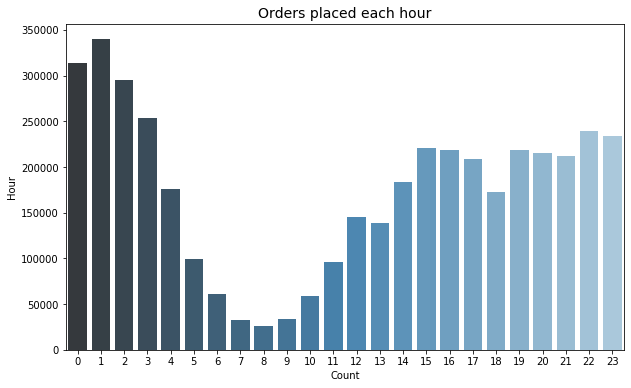

In [21]:
x=Conversions.groupby('hour')['cart_value'].sum()
x=x.reset_index()
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(y='cart_value', x='hour', data=x, ci=None,
                 palette='Blues_d')
ax.set_title('Orders placed each hour', size=14)
ax.set_ylabel('Hour')
ax.set_xlabel('Count')

plt.show()

#### From the above graph we could tell that maximum traffic on the site is at night(maximum products are bought in those hours) 

### Model Building and Feature Selection

In [9]:
groupby_Behavior = Behavior.groupby(['user_id','browsing_url']).agg({'timestamp':'count','Confirmed':'mean'})
# timestamp- here the column represents the no. of times each section was viewed by a each customer.

In [10]:
groupby_Behavior.reset_index()

,user_id,browsing_url,timestamp,Confirmed
0,2,content,6,0
1,2,default,1,0
2,2,home,1,0
3,2,product,6,0
4,2,product-listing-category,1,0
5,5,product,2,0
6,342391,home,4,0
7,342391,product,3,0
8,420372,product,2,0
9,915687,home,1,0


In [11]:
pivot_data_con=Behavior.pivot_table(index=['user_id','Confirmed'],columns='browsing_url', values='timestamp',aggfunc='count').fillna(0)

In [12]:
model_data = pivot_data_con.reset_index()
model_data.head()
#create features for each browsing_url using pivot_table (panda function) 
#filled the values with the number of times the user have visited that url.

browsing_url,user_id,Confirmed,cart,category,content,default,error,home,iroa,lorigreiner,mys,product,product-listing-category,product-listing-custom,product-listing-search,productNotFound,shoplive,signupcomplete
0,2,0,0.0,0.0,6.0,1.0,0.0,1.0,0.0,0.0,0.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0
1,5,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2,342391,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
3,420372,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
4,915687,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [13]:
x=model_data.drop('Confirmed', axis=1)
y=model_data['Confirmed']

In [14]:
x_train, x_test, y_train, y_test =train_test_split(x,y, test_size=0.2, random_state=0)

### Random Forest

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score,log_loss
Random_Forest =RandomForestClassifier(random_state=42)
Random_Forest.fit(x_train,y_train)
y_pred = Random_Forest.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy is ",accuracy)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix is :", cm, sep='\n')
Recal= recall_score(y_test, y_pred)
Precision =precision_score(y_test, y_pred)
F1_Score=f1_score(y_test, y_pred)
print("Recall is :", Recal, sep='\n')
print("Precision is :", Precision, sep='\n')
print("F1-Score is :", F1_Score, sep='\n')

C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy is  0.9209088183233869
Confusion Matrix is :
[[92169  3026]
 [ 5151  3041]]
Recall is :
0.3712158203125
Precision is :
0.5012361958134168
F1-Score is :
0.42653762535942213


In [29]:
probs_Random_Forest =Random_Forest.predict_proba(x_test)
probs_Random_Forest

array([[1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       ...,
       [1. , 0. ],
       [0.5, 0.5],
       [1. , 0. ]])

Feature Importance for Random_Forest

Feature ranking:
1. user_id (0.317801)
2. cart (0.309078)
3. category (0.097762)
4. content (0.058208)
5. default (0.050562)
6. error (0.047115)
7. home (0.041173)
8. iroa (0.034006)
9. lorigreiner (0.029537)
10. mys (0.008024)
11. product (0.004317)
12. product-listing-category (0.001475)
13. product-listing-custom (0.000902)
14. product-listing-search (0.000024)
15. productNotFound (0.000017)
16. shoplive (0.000000)
17. signupcomplete (0.000000)


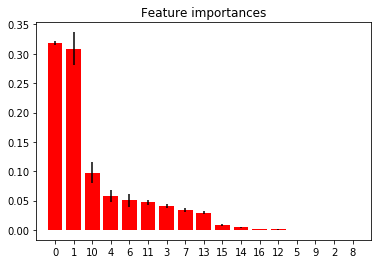

In [30]:
col_names = list(x.columns.values)
importances = Random_Forest.feature_importances_
std = np.std([i.feature_importances_ for i in Random_Forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, col_names[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), indices)
plt.xlim([-1, x_train.shape[1]])
plt.show()

In [31]:
## Our model is giving us 92% accuracy on the testing data

The accuracy on the test set is 92%, the baseline accuracy is:

In [32]:
1-sum(model_data['Confirmed'])/len(model_data['Confirmed'])

0.9209701101307525

### LogisticRegression

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
accuracy = metrics.accuracy_score(y_test,y_pred)
print("Accuracy is ",accuracy)
cm = confusion_matrix(y_test, y_pred) 
Recal= recall_score(y_test, y_pred)
Precision =precision_score(y_test, y_pred)
F1_Score=f1_score(y_test, y_pred)
Log_loss=log_loss(y_test, y_pred)
print("Log_loss :", Log_loss, sep='\n')
print("Recal is :", Recal, sep='\n')
print("Precision is :", Precision, sep='\n')
print("F1_Score is :", F1_Score, sep='\n')
print("Confusion Matrix is :", cm, sep='\n')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy is  0.9207637323841489
Log_loss :
2.7367237295511853
Recal is :
0.0
Precision is :
0.0
F1_Score is :
0.0
Confusion Matrix is :
[[95195     0]
 [ 8192     0]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [34]:
probs_lr =lr.predict_proba(x_test)
probs_lr

array([[0.97938909, 0.02061091],
       [0.52304346, 0.47695654],
       [0.96804961, 0.03195039],
       ...,
       [0.61027619, 0.38972381],
       [0.88411851, 0.11588149],
       [0.92055202, 0.07944798]])

Gradient Boost Classification

In [71]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators = 100, random_state=0)
gb.fit(x_train, y_train)
y_pred = gb.predict(x_test)
print("Accuracy is", metrics.accuracy_score(y_test, y_pred)*100)
cm = confusion_matrix(y_test, y_pred)
F1_Score=f1_score(y_test, y_pred)
Recal= recall_score(y_test, y_pred)
Precision =precision_score(y_test, y_pred)
Log_loss=log_loss(y_test, y_pred)
print("Log_loss :", Log_loss, sep='\n')
print("Recal is :", Recal, sep='\n')
print("Precision is :", Precision, sep='\n')
print("F1_Score is :", F1_Score, sep='\n')
print("Confusion Matrix is :", cm, sep='\n')
print("Confusion Matrix is :", cm, sep='\n')

Accuracy is 93.29025893003956
Log_loss :
2.317481823090556
Recal is :
0.458740234375
Precision is :
0.6002236064526434
F1_Score is :
0.5200304435065385
Confusion Matrix is :
[[92692  2503]
 [ 4434  3758]]
Confusion Matrix is :
[[92692  2503]
 [ 4434  3758]]


In [72]:
probs_gb = gb.predict_proba(x_test)
probs_gb

array([[0.99759728, 0.00240272],
       [0.97447558, 0.02552442],
       [0.99691139, 0.00308861],
       ...,
       [0.98266429, 0.01733571],
       [0.50748779, 0.49251221],
       [0.96983646, 0.03016354]])

Feature Importances

Feature ranking:
1. cart (0.870184)
2. category (0.053271)
3. content (0.030068)
4. default (0.026109)
5. error (0.012963)
6. home (0.004771)
7. iroa (0.001723)
8. lorigreiner (0.000754)
9. mys (0.000098)
10. product (0.000033)
11. product-listing-category (0.000028)
12. product-listing-custom (0.000000)
13. product-listing-search (0.000000)
14. productNotFound (0.000000)
15. shoplive (0.000000)
16. signupcomplete (0.000000)


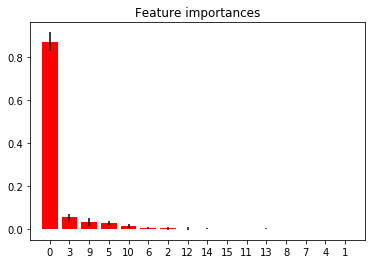

In [73]:
col_names = list(x.columns.values)
importances = gb.feature_importances_
std = np.std([i.feature_importances_ for i in Random_Forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, col_names[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), indices)
plt.xlim([-1, x_train.shape[1]])
plt.show()

AdaBoost Classification

In [74]:
ab = AdaBoostClassifier(n_estimators = 100, random_state=0)
ab.fit(x_train, y_train)
y_pred = ab.predict(x_test)
print("Accuracy is", metrics.accuracy_score(y_test, y_pred)*100)
cm = confusion_matrix(y_test, y_pred)
F1_Score=f1_score(y_test, y_pred)
Recal= recall_score(y_test, y_pred)
Precision =precision_score(y_test, y_pred)
Log_loss=log_loss(y_test, y_pred)
print("Log_loss :", Log_loss, sep='\n')
print("Recal is :", Recal, sep='\n')
print("Precision is :", Precision, sep='\n')
print("F1_Score is :", F1_Score, sep='\n')
print("Confusion Matrix is :", cm, sep='\n')

Accuracy is 93.15581262634566
Log_loss :
2.3639182174534583
Recal is :
0.4462890625
Precision is :
0.5900581020012912
F1_Score is :
0.5082012788434807
Confusion Matrix is :
[[92655  2540]
 [ 4536  3656]]


In [75]:
probs_ab = ab.predict_proba(x_test)
probs_ab

array([[0.51891899, 0.48108101],
       [0.5090142 , 0.4909858 ],
       [0.51621455, 0.48378545],
       ...,
       [0.51009923, 0.48990077],
       [0.50042589, 0.49957411],
       [0.50990871, 0.49009129]])

Feature Importance

Feature ranking:
1. cart (0.210000)
2. category (0.170000)
3. content (0.110000)
4. default (0.100000)
5. error (0.100000)
6. home (0.080000)
7. iroa (0.080000)
8. lorigreiner (0.050000)
9. mys (0.050000)
10. product (0.020000)
11. product-listing-category (0.010000)
12. product-listing-custom (0.010000)
13. product-listing-search (0.010000)
14. productNotFound (0.000000)
15. shoplive (0.000000)
16. signupcomplete (0.000000)


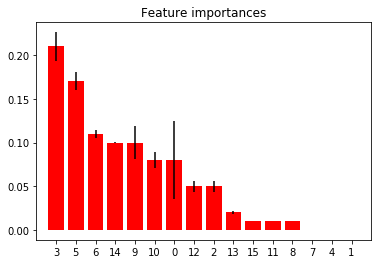

In [76]:
col_names = list(x.columns.values)
importances = ab.feature_importances_
std = np.std([i.feature_importances_ for i in Random_Forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, col_names[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), indices)
plt.xlim([-1, x_train.shape[1]])
plt.show()

The most important feature is User_id but ids is not important for conversion

droping user id

In [16]:
x=x.drop('user_id',axis=1)

In [17]:
x_train, x_test, y_train, y_test =train_test_split(x,y, test_size=0.2, random_state=0)

Random Forest

In [79]:
Random_Forest =RandomForestClassifier(random_state=42)
Random_Forest.fit(x_train,y_train)
Random_Forest.score(x_test,y_test)
y_pred = Random_Forest.predict(x_test)
accuracy = metrics.accuracy_score(y_test,y_pred)
print("Accuracy is ",accuracy)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix is :", cm, sep='\n')
Recal= recall_score(y_test, y_pred)
Precision =precision_score(y_test, y_pred)
F1_Score=f1_score(y_test, y_pred)
Log_loss=log_loss(y_test, y_pred)
print("Log_loss :", Log_loss, sep='\n')
print("Recal is :", Recal, sep='\n')
print("Precision is :", Precision, sep='\n')
print("F1-Score is :", F1_Score, sep='\n')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy is  0.9260835501562092
Confusion Matrix is :
[[92540  2655]
 [ 4987  3205]]
Log_loss :
2.5530042668912403
Recal is :
0.3912353515625
Precision is :
0.5469283276450512
F1-Score is :
0.4561628237973242


In [80]:
Random_Forest.score(x_test,y_test)

0.9260835501562092

In [81]:
Random_Forest.predict_proba(x_test)


array([[1.        , 0.        ],
       [1.        , 0.        ],
       [0.99841347, 0.00158653],
       ...,
       [1.        , 0.        ],
       [0.9       , 0.1       ],
       [1.        , 0.        ]])

Didnt find any changes in accuracy score

Feature ranking:
1. cart (0.429071)
2. category (0.155362)
3. content (0.079694)
4. default (0.072683)
5. error (0.072450)
6. home (0.064657)
7. iroa (0.056340)
8. lorigreiner (0.047092)
9. mys (0.013072)
10. product (0.005694)
11. product-listing-category (0.002333)
12. product-listing-custom (0.001498)
13. product-listing-search (0.000038)
14. productNotFound (0.000017)
15. shoplive (0.000000)
16. signupcomplete (0.000000)


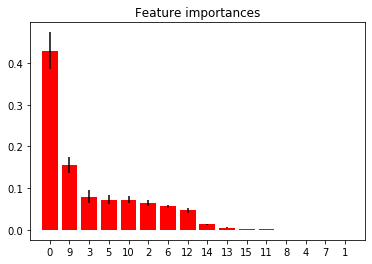

In [82]:
col_names = list(x.columns.values)
importances = Random_Forest.feature_importances_
std = np.std([i.feature_importances_ for i in Random_Forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, col_names[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), indices)
plt.xlim([-1, x_train.shape[1]])
plt.show()

LogisticRegression

In [83]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
accuracy = metrics.accuracy_score(y_test,y_pred)
print("Accuracy is ",accuracy)
cm = confusion_matrix(y_test, y_pred) 
Recal= recall_score(y_test, y_pred)
Precision =precision_score(y_test, y_pred)
F1_Score=f1_score(y_test, y_pred)
Log_loss=log_loss(y_test, y_pred)
print("Log_loss :", Log_loss, sep='\n')
print("Recal is :", Recal, sep='\n')
print("Precision is :", Precision, sep='\n')
print("F1_Score is :", F1_Score, sep='\n')
print("Confusion Matrix is :", cm, sep='\n')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy is  0.9232011761633474
Log_loss :
2.6525419978959093
Recal is :
0.103271484375
Precision is :
0.5875
F1_Score is :
0.17566445182724252
Confusion Matrix is :
[[94601   594]
 [ 7346   846]]


In [84]:
probs_lr =lr.predict_proba(x_test)
probs_lr

array([[0.95481675, 0.04518325],
       [0.93001122, 0.06998878],
       [0.94475506, 0.05524494],
       ...,
       [0.93051598, 0.06948402],
       [0.80745232, 0.19254768],
       [0.90925008, 0.09074992]])

Gradient Boost Classification

In [20]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn import metrics
gb = GradientBoostingClassifier(n_estimators = 100, random_state=0)
gb.fit(x_train, y_train)
y_pred = gb.predict(x_test)
print("Accuracy is", metrics.accuracy_score(y_test, y_pred)*100)
cm = confusion_matrix(y_test, y_pred)
F1_Score=f1_score(y_test, y_pred)
Recal= recall_score(y_test, y_pred)
Precision =precision_score(y_test, y_pred)
Log_loss=log_loss(y_test, y_pred)
print("Log_loss :", Log_loss, sep='\n')
print("Recal is :", Recal, sep='\n')
print("Precision is :", Precision, sep='\n')
print("F1_Score is :", F1_Score, sep='\n')
print("Confusion Matrix is :", cm, sep='\n')
print("Confusion Matrix is :", cm, sep='\n')

Accuracy is 93.29025893003956
Log_loss :
2.317481823090556
Recal is :
0.458740234375
Precision is :
0.6002236064526434
F1_Score is :
0.5200304435065385
Confusion Matrix is :
[[92692  2503]
 [ 4434  3758]]
Confusion Matrix is :
[[92692  2503]
 [ 4434  3758]]


In [21]:
probs_gb = gb.predict_proba(x_test)
probs_gb

array([[0.99759728, 0.00240272],
       [0.97447558, 0.02552442],
       [0.99691139, 0.00308861],
       ...,
       [0.98266429, 0.01733571],
       [0.50748779, 0.49251221],
       [0.96983646, 0.03016354]])

Hyper_tunning

In [ ]:
gb = GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=16,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
gb.fit(x_train, y_train)
y_pred = gb.predict(x_test)
print("Accuracy is", metrics.accuracy_score(y_test, y_pred)*100)
cm = confusion_matrix(y_test, y_pred)
F1_Score=f1_score(y_test, y_pred)
Recal= recall_score(y_test, y_pred)
Precision =precision_score(y_test, y_pred)
Log_loss=log_loss(y_test, y_pred)
print("Log_loss :", Log_loss, sep='\n')
print("Recal is :", Recal, sep='\n')
print("Precision is :", Precision, sep='\n')
print("F1_Score is :", F1_Score, sep='\n')
print("Confusion Matrix is :", cm, sep='\n')
print("Confusion Matrix is :", cm, sep='\n')

In [22]:
gb

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Feature importances

Feature ranking:
1. cart (0.870184)
2. category (0.053271)
3. content (0.030068)
4. default (0.026109)
5. error (0.012963)
6. home (0.004771)
7. iroa (0.001723)
8. lorigreiner (0.000754)
9. mys (0.000098)
10. product (0.000033)
11. product-listing-category (0.000028)
12. product-listing-custom (0.000000)
13. product-listing-search (0.000000)
14. productNotFound (0.000000)
15. shoplive (0.000000)
16. signupcomplete (0.000000)


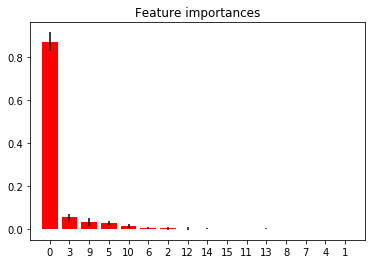

In [87]:
col_names = list(x.columns.values)
importances = gb.feature_importances_
std = np.std([i.feature_importances_ for i in Random_Forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, col_names[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), indices)
plt.xlim([-1, x_train.shape[1]])
plt.show()

AdaBoost Classification

In [88]:
ab = AdaBoostClassifier(n_estimators = 100, random_state=0)
ab.fit(x_train, y_train)
y_pred = ab.predict(x_test)
print("Accuracy is", metrics.accuracy_score(y_test, y_pred)*100)
cm = confusion_matrix(y_test, y_pred)
F1_Score=f1_score(y_test, y_pred)
Recal= recall_score(y_test, y_pred)
Precision =precision_score(y_test, y_pred)
Log_loss=log_loss(y_test, y_pred)
print("Log_loss :", Log_loss, sep='\n')
print("Recal is :", Recal, sep='\n')
print("Precision is :", Precision, sep='\n')
print("F1_Score is :", F1_Score, sep='\n')
print("Confusion Matrix is :", cm, sep='\n')

Accuracy is 93.15581262634566
Log_loss :
2.3639182174534583
Recal is :
0.4462890625
Precision is :
0.5900581020012912
F1_Score is :
0.5082012788434807
Confusion Matrix is :
[[92655  2540]
 [ 4536  3656]]


In [89]:
probs_ab = ab.predict_proba(x_test)
probs_ab

array([[0.51891899, 0.48108101],
       [0.5090142 , 0.4909858 ],
       [0.51621455, 0.48378545],
       ...,
       [0.51009923, 0.48990077],
       [0.50042589, 0.49957411],
       [0.50990871, 0.49009129]])

Feature Importance

Feature ranking:
1. cart (0.210000)
2. category (0.170000)
3. content (0.110000)
4. default (0.100000)
5. error (0.100000)
6. home (0.080000)
7. iroa (0.080000)
8. lorigreiner (0.050000)
9. mys (0.050000)
10. product (0.020000)
11. product-listing-category (0.010000)
12. product-listing-custom (0.010000)
13. product-listing-search (0.010000)
14. productNotFound (0.000000)
15. shoplive (0.000000)
16. signupcomplete (0.000000)


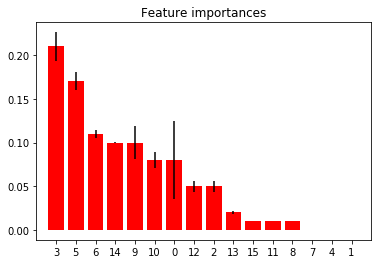

In [90]:
col_names = list(x.columns.values)
importances = ab.feature_importances_
std = np.std([i.feature_importances_ for i in Random_Forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, col_names[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), indices)
plt.xlim([-1, x_train.shape[1]])
plt.show()

we find some changes in feature importance

### lets Normalization data set

Min Max Normalization

In [91]:
def normalize(column):
    upper = column.max()
    lower = column.min()
    m = (column - lower)/(upper-lower)
    return m
x = normalize(x)

In [92]:
x.head(2)

browsing_url,cart,category,content,default,error,home,iroa,lorigreiner,mys,product,product-listing-category,product-listing-custom,product-listing-search,productNotFound,shoplive,signupcomplete
0,0.0,0.0,0.038217,0.001838,0.0,0.00885,0.0,0.0,0.0,0.008075,0.005848,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.0,0.002692,0.000000,0.0,0.0,0.0,0.0,0.0


In [93]:
x_train, x_test, y_train, y_test =train_test_split(x,y, test_size=0.2, random_state=0)

Logistic Regression

In [94]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
accuracy = metrics.accuracy_score(y_test,y_pred)
print("Accuracy is ",accuracy)
cm = confusion_matrix(y_test, y_pred) 
Recal= recall_score(y_test, y_pred)
Precision =precision_score(y_test, y_pred)
F1_Score=f1_score(y_test, y_pred)
Log_loss=log_loss(y_test, y_pred)
print("Log_loss :", Log_loss, sep='\n')
print("Recal is :", Recal, sep='\n')
print("Precision is :", Precision, sep='\n')
print("F1_Score is :", F1_Score, sep='\n')
print("Confusion Matrix is :", cm, sep='\n')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy is  0.9232011761633474
Log_loss :
2.6525419978959093
Recal is :
0.103271484375
Precision is :
0.5875
F1_Score is :
0.17566445182724252
Confusion Matrix is :
[[94601   594]
 [ 7346   846]]


In [95]:
lr.predict_proba(x_test)

array([[0.95481675, 0.04518325],
       [0.93001122, 0.06998878],
       [0.94475506, 0.05524494],
       ...,
       [0.93051598, 0.06948402],
       [0.80745232, 0.19254768],
       [0.90925008, 0.09074992]])

### Random Forest

In [96]:
from sklearn.ensemble import RandomForestClassifier
Random_Forest =RandomForestClassifier(random_state=42)
Random_Forest.fit(x_train,y_train)
Random_Forest.score(x_test,y_test)
y_pred = Random_Forest.predict(x_test)
accuracy = metrics.accuracy_score(y_test,y_pred)
print("Accuracy is ",accuracy)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix is :", cm, sep='\n')
Recal= recall_score(y_test, y_pred)
Precision =precision_score(y_test, y_pred)
F1_Score=f1_score(y_test, y_pred)
Log_loss=log_loss(y_test, y_pred)
print("Log_loss :", Log_loss, sep='\n')
print("Recal is :", Recal, sep='\n')
print("Precision is :", Precision, sep='\n')
print("F1-Score is :", F1_Score, sep='\n')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy is  0.9260835501562092
Confusion Matrix is :
[[92540  2655]
 [ 4987  3205]]
Log_loss :
2.5530042668912403
Recal is :
0.3912353515625
Precision is :
0.5469283276450512
F1-Score is :
0.4561628237973242


In [97]:
probs_Random_Forest =Random_Forest.predict_proba(x_test)
probs_Random_Forest

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [0.99841347, 0.00158653],
       ...,
       [1.        , 0.        ],
       [0.9       , 0.1       ],
       [1.        , 0.        ]])

feature importances

Feature ranking:
1. cart (0.429071)
2. category (0.155362)
3. content (0.079694)
4. default (0.072683)
5. error (0.072450)
6. home (0.064657)
7. iroa (0.056340)
8. lorigreiner (0.047092)
9. mys (0.013072)
10. product (0.005694)
11. product-listing-category (0.002333)
12. product-listing-custom (0.001498)
13. product-listing-search (0.000038)
14. productNotFound (0.000017)
15. shoplive (0.000000)
16. signupcomplete (0.000000)


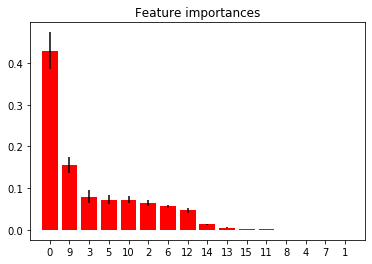

In [98]:
col_names = list(x.columns.values)
importances = Random_Forest.feature_importances_
std = np.std([i.feature_importances_ for i in Random_Forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, col_names[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), indices)
plt.xlim([-1, x_train.shape[1]])
plt.show()

Gradient Boost Classification

In [99]:
gb = GradientBoostingClassifier(n_estimators = 100, random_state=0)
gb.fit(x_train, y_train)
y_pred = gb.predict(x_test)
print("Accuracy is", metrics.accuracy_score(y_test, y_pred)*100)
cm = confusion_matrix(y_test, y_pred)
F1_Score=f1_score(y_test, y_pred)
Recal= recall_score(y_test, y_pred)
Precision =precision_score(y_test, y_pred)
Log_loss=log_loss(y_test, y_pred)
print("Log_loss :", Log_loss, sep='\n')
print("Recal is :", Recal, sep='\n')
print("Precision is :", Precision, sep='\n')
print("F1_Score is :", F1_Score, sep='\n')
print("Confusion Matrix is :", cm, sep='\n')

Accuracy is 93.29025893003956
Log_loss :
2.317481823090556
Recal is :
0.458740234375
Precision is :
0.6002236064526434
F1_Score is :
0.5200304435065385
Confusion Matrix is :
[[92692  2503]
 [ 4434  3758]]
Confusion Matrix is :
[[92692  2503]
 [ 4434  3758]]


In [100]:
probs_gb = gb.predict_proba(x_test)
probs_gb

array([[0.99759728, 0.00240272],
       [0.97447558, 0.02552442],
       [0.99691139, 0.00308861],
       ...,
       [0.98266429, 0.01733571],
       [0.50748779, 0.49251221],
       [0.96983646, 0.03016354]])

feature importances

Feature ranking:
1. cart (0.870184)
2. category (0.053271)
3. content (0.030068)
4. default (0.026109)
5. error (0.012963)
6. home (0.004771)
7. iroa (0.001723)
8. lorigreiner (0.000754)
9. mys (0.000098)
10. product (0.000033)
11. product-listing-category (0.000028)
12. product-listing-custom (0.000000)
13. product-listing-search (0.000000)
14. productNotFound (0.000000)
15. shoplive (0.000000)
16. signupcomplete (0.000000)


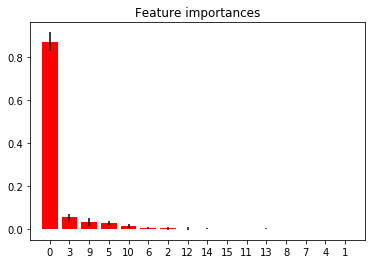

In [101]:
col_names = list(x.columns.values)
importances = gb.feature_importances_
std = np.std([i.feature_importances_ for i in Random_Forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, col_names[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), indices)
plt.xlim([-1, x_train.shape[1]])
plt.show()

In [106]:
ls=[]
for i in probs_gb:
    ls.append(round(i[1]*100))
ls

[0.0,
 3.0,
 0.0,
 2.0,
 0.0,
 42.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 2.0,
 1.0,
 0.0,
 1.0,
 0.0,
 6.0,
 0.0,
 19.0,
 1.0,
 1.0,
 0.0,
 1.0,
 39.0,
 34.0,
 4.0,
 24.0,
 3.0,
 28.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 2.0,
 1.0,
 54.0,
 0.0,
 1.0,
 1.0,
 3.0,
 26.0,
 2.0,
 0.0,
 2.0,
 3.0,
 0.0,
 1.0,
 0.0,
 1.0,
 11.0,
 1.0,
 1.0,
 0.0,
 5.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 0.0,
 1.0,
 18.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 4.0,
 58.0,
 1.0,
 3.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 57.0,
 1.0,
 1.0,
 0.0,
 4.0,
 1.0,
 1.0,
 1.0,
 1.0,
 3.0,
 2.0,
 0.0,
 2.0,
 43.0,
 2.0,
 0.0,
 1.0,
 9.0,
 2.0,
 12.0,
 0.0,
 3.0,
 40.0,
 1.0,
 17.0,
 64.0,
 0.0,
 2.0,
 0.0,
 0.0,
 6.0,
 0.0,
 1.0,
 1.0,
 2.0,
 1.0,
 0.0,
 2.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 5.0,
 2.0,
 51.0,
 1.0,
 2.0,
 1.0,
 1.0,
 0.0,
 9.0,
 1.0,
 0.0,
 1.0,
 2.0,
 38.0,
 1.0,
 2.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 8.0,
 0.0,
 66.0,
 60.0,
 4.0,
 59.0,
 0.0,
 1.0,
 1.0,
 4.0,
 13.0,
 0.0,
 1.0,
 2.0,
 0.0,
 2.0,
 2.0,
 63.0

In [107]:
x_test['% conversion probablity score'] = ls

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [108]:
x_test

browsing_url,cart,category,content,default,error,home,iroa,lorigreiner,mys,product,product-listing-category,product-listing-custom,product-listing-search,productNotFound,shoplive,signupcomplete,% conversion probablity score
456126,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.000000,0.011696,0.0,0.000000,0.0,0.0,0.0,0.0
10922,0.000000,0.0,0.006369,0.000000,0.0,0.017699,0.00226,0.0,0.0,0.004038,0.005848,0.0,0.000000,0.0,0.0,0.0,3.0
402610,0.000000,0.0,0.000000,0.000000,0.0,0.008850,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
16764,0.000000,0.0,0.000000,0.000000,0.0,0.017699,0.00000,0.0,0.0,0.001346,0.005848,0.0,0.008475,0.0,0.0,0.0,2.0
10536,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.000000,0.005848,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340341,0.000000,0.0,0.006369,0.000000,0.0,0.017699,0.00000,0.0,0.0,0.009421,0.023392,0.0,0.000000,0.0,0.0,0.0,2.0
128234,0.000000,0.0,0.000000,0.003676,0.0,0.035398,0.00000,0.0,0.0,0.001346,0.000000,0.0,0.000000,0.0,0.0,0.0,7.0
53108,0.000000,0.0,0.057325,0.000000,0.0,0.008850,0.00226,0.0,0.0,0.010767,0.011696,0.0,0.000000,0.0,0.0,0.0,2.0
239921,0.020161,0.0,0.000000,0.005515,0.0,0.000000,0.00000,0.0,0.0,0.013459,0.023392,0.0,0.000000,0.0,0.0,0.0,49.0


AdaBoost Classification

In [102]:
ab = AdaBoostClassifier(n_estimators = 100, random_state=0)
ab.fit(x_train, y_train)
y_pred = ab.predict(x_test)
print("Accuracy is", metrics.accuracy_score(y_test, y_pred)*100)
cm = confusion_matrix(y_test, y_pred)
F1_Score=f1_score(y_test, y_pred)
Recal= recall_score(y_test, y_pred)
Precision =precision_score(y_test, y_pred)
Log_loss=log_loss(y_test, y_pred)
print("Log_loss :", Log_loss, sep='\n')
print("Recal is :", Recal, sep='\n')
print("Precision is :", Precision, sep='\n')
print("F1_Score is :", F1_Score, sep='\n')
print("Confusion Matrix is :", cm, sep='\n')

Accuracy is 93.15581262634566
Log_loss :
2.3639182174534583
Recal is :
0.4462890625
Precision is :
0.5900581020012912
F1_Score is :
0.5082012788434807
Confusion Matrix is :
[[92655  2540]
 [ 4536  3656]]


In [103]:
probs_ab = ab.predict_proba(x_test)
probs_ab

array([[0.51891899, 0.48108101],
       [0.5090142 , 0.4909858 ],
       [0.51621455, 0.48378545],
       ...,
       [0.51009923, 0.48990077],
       [0.50042589, 0.49957411],
       [0.50990871, 0.49009129]])

Feature Importance

Feature ranking:
1. cart (0.210000)
2. category (0.170000)
3. content (0.110000)
4. default (0.100000)
5. error (0.100000)
6. home (0.080000)
7. iroa (0.080000)
8. lorigreiner (0.050000)
9. mys (0.050000)
10. product (0.020000)
11. product-listing-category (0.010000)
12. product-listing-custom (0.010000)
13. product-listing-search (0.010000)
14. productNotFound (0.000000)
15. shoplive (0.000000)
16. signupcomplete (0.000000)


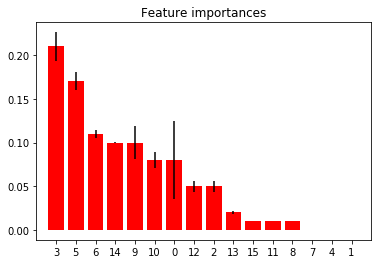

In [104]:
col_names = list(x.columns.values)
importances = ab.feature_importances_
std = np.std([i.feature_importances_ for i in Random_Forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, col_names[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), indices)
plt.xlim([-1, x_train.shape[1]])
plt.show()

In [109]:
Behavior.corr()

,user_id,Confirmed,hour
user_id,1.000000,-0.000900,0.001228
Confirmed,-0.000900,1.000000,-0.080807
hour,0.001228,-0.080807,1.000000


In [110]:
Behavior

,timestamp,user_id,browsing_url,Confirmed,Time,Dates,hour
101128,2017-07-26 00:47:58.32,544439661706349,product,0,00:47:58.320000,2017-07-26,0
101129,2017-07-26 00:09:03.411,634394594974068,content,0,00:09:03.411000,2017-07-26,0
101130,2017-07-26 00:09:09.116,634394594974068,content,0,00:09:09.116000,2017-07-26,0
101131,2017-07-26 00:11:07.333,634394594974068,content,0,00:11:07.333000,2017-07-26,0
101132,2017-07-26 00:11:29.141,634394594974068,content,0,00:11:29.141000,2017-07-26,0
...,...,...,...,...,...,...,...
5535918,2017-07-26 23:18:53.789,9221827579306644828,iroa,1,23:18:53.789000,2017-07-26,23
5535919,2017-07-26 23:19:03.394,9221827579306644828,iroa,1,23:19:03.394000,2017-07-26,23
5535920,2017-07-26 23:19:11.569,9221827579306644828,product,1,23:19:11.569000,2017-07-26,23
5535921,2017-07-26 23:21:56.085,9221827579306644828,product,1,23:21:56.085000,2017-07-26,23


# Optimization

In [111]:
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn import tree
from sklearn.metrics import make_scorer,recall_score,f1_score

In [112]:
pipe_tree = Pipeline([('decisiontreeclassifier',gb)])
pipe_tree

Pipeline(memory=None,
         steps=[('decisiontreeclassifier',
                 GradientBoostingClassifier(criterion='friedman_mse', init=None,
                                            learning_rate=0.1, loss='deviance',
                                            max_depth=3, max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=100,
                                            n_iter_no_change=None,
                                            presort='auto', random_state=0,
                                            subsample=1.0, tol=0.0001,
              

In [113]:
macro_scorer = make_scorer(f1_score,greater_is_better=True)
#score = make_scorer(((cross_val_score(dtc, X_train, Y_train, cv=5, scoring='recall_macro')).mean()),greater_is_better=False)

In [114]:
depths = np.arange(1,5)
depths
num_leafs = [1, 5, 10, 20]

In [122]:
from sklearn.model_selection import GridSearchCV
param_grid = [{'decisiontreeclassifier__max_depth':depths,
              'decisiontreeclassifier__min_samples_leaf':num_leafs,'decisiontreeclassifier__random_state':[100,200,300,786]}]

In [123]:
pipe_tree.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'decisiontreeclassifier', 'decisiontreeclassifier__criterion', 'decisiontreeclassifier__init', 'decisiontreeclassifier__learning_rate', 'decisiontreeclassifier__loss', 'decisiontreeclassifier__max_depth', 'decisiontreeclassifier__max_features', 'decisiontreeclassifier__max_leaf_nodes', 'decisiontreeclassifier__min_impurity_decrease', 'decisiontreeclassifier__min_impurity_split', 'decisiontreeclassifier__min_samples_leaf', 'decisiontreeclassifier__min_samples_split', 'decisiontreeclassifier__min_weight_fraction_leaf', 'decisiontreeclassifier__n_estimators', 'decisiontreeclassifier__n_iter_no_change', 'decisiontreeclassifier__presort', 'decisiontreeclassifier__random_state', 'decisiontreeclassifier__subsample', 'decisiontreeclassifier__tol', 'decisiontreeclassifier__validation_fraction', 'decisiontreeclassifier__verbose', 'decisiontreeclassifier__warm_start'])

In [ ]:
#clf = GridSearchCV(pipe_tree,param_grid, scoring=macro_scorer, cv=4)

clf = GridSearchCV(pipe_tree,param_grid,scoring=macro_scorer,cv=4)
gd=clf.fit(x_train, y_train)

In [119]:
sdf = pd.DataFrame(gd.cv_results_)
sdf

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_decisiontreeclassifier__random_state,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,61.321964,2.783700,0.437251,0.097010,1,{'decisiontreeclassifier__random_state': 1},0.511946,0.511486,0.524991,0.508798,0.514305,0.006286,1
1,61.302887,3.060961,0.599413,0.139719,2,{'decisiontreeclassifier__random_state': 2},0.511842,0.511486,0.524991,0.508798,0.514279,0.006296,4
2,61.896796,1.362530,0.479992,0.083076,3,{'decisiontreeclassifier__random_state': 3},0.511946,0.511486,0.524991,0.508798,0.514305,0.006286,1
3,62.825755,6.049469,0.529210,0.128701,4,{'decisiontreeclassifier__random_state': 4},0.511946,0.511486,0.524991,0.508798,0.514305,0.006286,1


In [121]:
gd.best_estimator_

Pipeline(memory=None,
         steps=[('decisiontreeclassifier',
                 GradientBoostingClassifier(criterion='friedman_mse', init=None,
                                            learning_rate=0.1, loss='deviance',
                                            max_depth=3, max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=100,
                                            n_iter_no_change=None,
                                            presort='auto', random_state=1,
                                            subsample=1.0, tol=0.0001,
              

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
my_model = gd.best_estimator_
my_model.fit(X_train, Y_train)
pre_gd = my_model.predict(X_test)
print(confusion_matrix(Y_test, pre_gd))
print(classification_report(Y_test,pre_gd))


In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cross_val_score(gb, X_train, Y_train, cv=6, scoring='recall_macro')

In [ ]:
#s=np.array([0.89637315, 0.86194351, 0.88899059, 0.85556682, 0.89526929])
#str(s.mean())